# MNIST Digit Classification using Kernel SVM  

*1 November 2018*  

#### ***[Soumya Ranjan Behera](https://www.linkedin.com/in/soumya044)***

### In this Kernel I have used a simple Polynomial kernel SVM Classifier (SVC) to classify the digits into their respective categories which have scored **97.314 %** Accuracy in the Digit Recognizer Competition.

### Goals of this Kenel:  
* To provide a basic implementation of Support Vector Classification  
* A beginner friendly kernel to show a procedure to compete in Kaggle Digit Recognizer Competition

**Dataset:**  
* ../input/  
       |_ train.csv  
       |_ test.csv  
       |_ sample_submission.csv

## 1. Prepare our Classification Model

### Import numpy and pandas


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("."))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'mnist-digit-recognizer-using-kernel-svm.ipynb', 'test.csv', 'train.csv']


### Import Visualization Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import train and test datasets

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Extract Features(X) and Labels(y) from datasets as Numpy Array

In [4]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

test = test.iloc[:,:].values

### Check for Missing Data (NaN)

In [5]:
np.unique(np.isnan(X))

array([False])

### Split Train data into Training and Validation sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Visualize the distribution of Training Set Labels  
This step is to check if there exist any biased or insufficient data for any class.

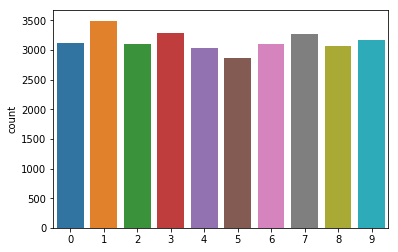

In [7]:
sns.countplot(y_train)

### Standardize the data
This step is to transform the data such that its distribution will have a mean value 0 and standard deviation of 1.  
Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset.

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_test = sc_X.transform(test)

c:\users\lucas prone\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\lucas prone\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\lucas prone\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\lucas prone\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 1.1 Fit the Support Vector Classifier to the Training data (Train our Model) 
Here I've used Polynomial Kernel. Feel free to use any other kernel and play with other parameters.

In [9]:
from sklearn.svm import SVC
print('SVM Classifier with gamma = 0.1; Kernel = Polynomial')
classifier = SVC(gamma=0.1, kernel='poly', random_state = 0)
classifier.fit(X_train,y_train)

SVM Classifier with gamma = 0.1; Kernel = Polynomial


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

### Predict the labels with Validation Data

In [10]:
y_pred = classifier.predict(X_test)

## 1.2 Performance Evaluation  
### Calculate the Model Accuracy and Confusion Matrix

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix
model_acc = classifier.score(X_test, y_test)
test_acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test,y_pred)

In [12]:
print('\nSVM Trained Classifier Accuracy: ', model_acc)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Images: ',test_acc)
print('\nConfusion Matrix: \n',conf_mat)


SVM Trained Classifier Accuracy:  0.974

Predicted Values:  [3 6 9 ... 4 0 5]

Accuracy of Classifier on Validation Images:  0.974

Confusion Matrix: 
 [[ 998    0    4    1    3    1    5    0    3    0]
 [   0 1180    5    1    0    0    0    1    2    1]
 [   4    0 1049    4    2    0    1    4   12    1]
 [   1    1    6 1022    1   14    0    5   14    6]
 [   1    3    4    0 1007    1    3    0    2   13]
 [   0    0    2    3    2  905    7    0    7    4]
 [   2    0    1    0    2    6 1031    0    2    0]
 [   3    5    7    1    7    1    0 1096    0    9]
 [   3    1    3    7    1    7    3    0  967    3]
 [   4    1    5    2   13    2    0   11    6  972]]


### Plot the Confusion Matrix with matplotlib.pyplot

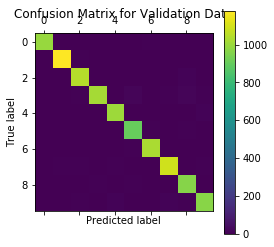

In [13]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 2. Test our Model

### 2.1 Predict for the ' test ' data provided for competition  
Here I've scaled the 'test' data to 'sc_test'

In [14]:
result = classifier.predict(sc_test)

### Visualize some Sample Image Prediction from ' test ' data

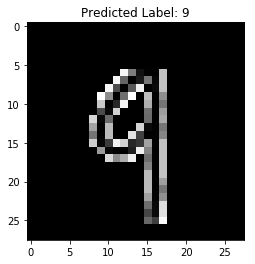

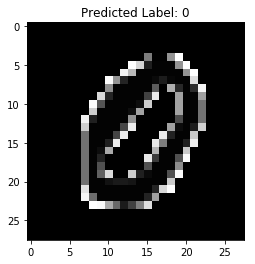

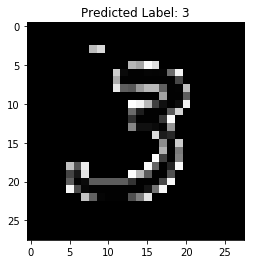

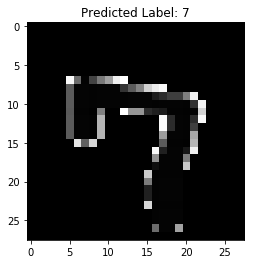

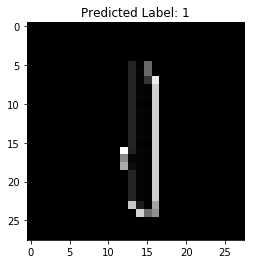

In [15]:
a = np.random.randint(1,400,5)
for i in a:
    two_d = (np.reshape(test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Predicted Label: {0}'.format(result[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

## 3. Prepare for Final Submission  

### Convert Numpy Array to Pandas Series and provide Column names

In [16]:
submission = pd.Series(result,name="Label")

### Concat ' ImageId ' Column  with the '*submission*' Pandas series

In [17]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


## 3.1 Convert the Pandas Series to CSV file

In [18]:
submission.to_csv("final_submission_v1.csv",index=False)

### A Simple Tricky Markdown to download Submission file while running your notebook in cloud

click <a href="./final_submission_v1.csv">here</a> to download the generated submission file

### Verify your submission csv file before submitting it

In [19]:
final_submission = pd.read_csv("final_submission_v1.csv")

In [20]:
final_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


# Thank You  

If you liked this kernel please **Upvote**. Don't forget to drop a comment or suggestion.  

### *Soumya Ranjan Behera*
Let's stay Connected! [LinkedIn](https://www.linkedin.com/in/soumya044)  

**Happy Coding !**